In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
ls  data/

crime_astros_final.csv*  crime_ru_final.csv*      crime_uh_final.csv*
crime_dynamo_final.csv*  crime_texans_final.csv*


In [6]:
path ='data/crime_texans_final.csv'

In [7]:
df = pd.read_csv(path)
df=df.rename(columns = {'Unnamed: 0':'date',
                       'Hour':'hour'})
df.hour = df.hour.astype(int)
df.day = df.day.astype(int)
df.year = df.year.astype(int)
df.date = pd.to_datetime(df.date)  # datetime index
#df = df.set_index('date').sort_index(ascending=True)
df['game_on'] = np.where(df.game =='No Game',0,1)
df.drop(['game'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21843 entries, 0 to 21842
Data columns (total 15 columns):
date            21843 non-null datetime64[ns]
Beat            21843 non-null object
OffenseType     21843 non-null object
Premise         21843 non-null object
NumOffenses     21843 non-null float64
hour            21843 non-null int64
day             21843 non-null int64
weekday         21843 non-null object
month           21843 non-null object
year            21843 non-null int64
lat             21843 non-null float64
lon             21843 non-null float64
full_address    21843 non-null object
dist_stadium    21843 non-null float64
game_on         21843 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.head(2)

,date,Beat,OffenseType,Premise,NumOffenses,hour,day,weekday,month,year,lat,lon,full_address,dist_stadium,game_on
0,2010-01-01,15E40x,Aggravated Assault,apartment,1.0,23,1,Friday,Jan,2010,29.682332,-95.416995,"2550 Westridge St, Houston, TX 77054, USA",0.405534,0
1,2010-01-01,15E40x,Aggravated Assault,apartment,1.0,23,1,Friday,Jan,2010,29.684531,-95.400313,"8350 Knight Rd, Houston, TX 77054, USA",0.632841,0


## Trim df

In [9]:
print(list(df.columns))

['date', 'Beat', 'OffenseType', 'Premise', 'NumOffenses', 'hour', 'day', 'weekday', 'month', 'year', 'lat', 'lon', 'full_address', 'dist_stadium', 'game_on']


In [10]:
#df= df[[ 'OffenseType', 'hour', 'weekday', 'dist_stadium', 'game_on']]
df = df[[ 'OffenseType', 'hour', 'weekday', 'dist_stadium', 'game_on']]

In [11]:
df.head()

,OffenseType,hour,weekday,dist_stadium,game_on
0,Aggravated Assault,23,Friday,0.405534,0
1,Aggravated Assault,23,Friday,0.632841,0
2,Theft,23,Friday,0.405534,0
3,Theft,23,Friday,0.632841,0
4,Theft,0,Saturday,0.892807,0


In [12]:
df.describe()

,hour,dist_stadium,game_on
count,21843.000000,21843.000000,21843.000000
mean,13.241084,1.621688,0.034885
std,6.317640,15.539142,0.183494
min,0.000000,0.143394,0.000000
25%,9.000000,0.567717,0.000000
50%,14.000000,0.752736,0.000000
75%,18.000000,1.091427,0.000000
max,23.000000,1330.411552,1.000000


## TEST1

In [13]:
one_mile =  df.dist_stadium <= 3.0
df = df[one_mile]

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


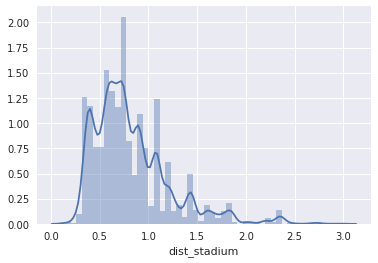

In [14]:

# find distribution of target column / trying to predict
sns.distplot(df['dist_stadium'])

In [15]:
df.corr()

,hour,dist_stadium,game_on
hour,1.000000,-0.090103,-0.024461
dist_stadium,-0.090103,1.000000,-0.052070
game_on,-0.024461,-0.052070,1.000000


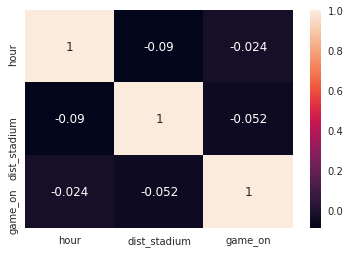

In [16]:

sns.heatmap(df.corr(),annot=True)

## Get dummies

In [ ]:
pd.get_dummies?

In [17]:
dfdm = pd.get_dummies(df, drop_first=True)

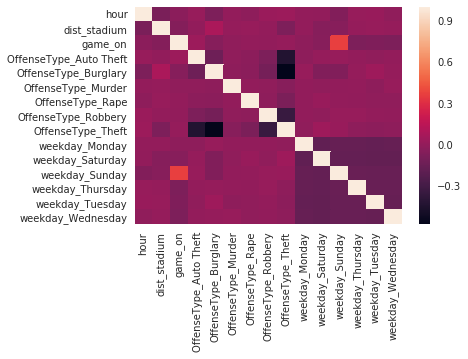

In [18]:
sns.heatmap(dfdm.corr(),annot=False)

In [19]:
dfdm.head()

,hour,dist_stadium,game_on,OffenseType_Auto Theft,OffenseType_Burglary,OffenseType_Murder,OffenseType_Rape,OffenseType_Robbery,OffenseType_Theft,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,23,0.405534,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23,0.632841,0,0,0,0,0,0,0,0,0,0,0,0,0
2,23,0.405534,0,0,0,0,0,0,1,0,0,0,0,0,0
3,23,0.632841,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.892807,0,0,0,0,0,0,1,0,1,0,0,0,0


In [20]:
df.head()

,OffenseType,hour,weekday,dist_stadium,game_on
0,Aggravated Assault,23,Friday,0.405534,0
1,Aggravated Assault,23,Friday,0.632841,0
2,Theft,23,Friday,0.405534,0
3,Theft,23,Friday,0.632841,0
4,Theft,0,Saturday,0.892807,0


## Pairplot

In [21]:
#sns.pairplot(dfdm)

In [22]:
#dfdm.drop(['dist_stadium'],axis=1)
#dfdm['game_on']

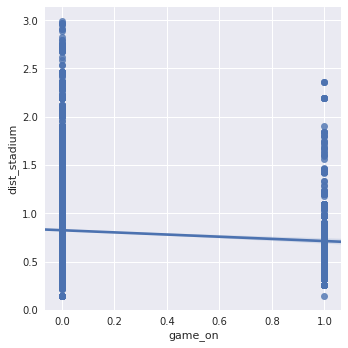

In [23]:
sns.lmplot(x='game_on',y='dist_stadium', data=dfdm)

In [24]:
from sklearn.cross_validation import train_test_split

X = dfdm.drop(['hour'],axis=1)

y = dfdm['hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3,
                                random_state=42)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# train model

In [25]:
from sklearn.linear_model import LinearRegression

# create a linear regression object
model =  LinearRegression()


# train fit model
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evalueate model

In [26]:
print(model.intercept_)
print(model.coef_)

15.185128711577743
[-1.49342758 -0.50504001  0.00969392 -1.29189093  1.51158677 -1.14525246
  0.59062784 -0.18700159 -0.45789248 -0.53620607 -1.26786644 -0.06003668
  0.0597725  -0.6593761 ]


## Create a dataframe from coeff

In [27]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
dist_stadium,-1.493428
game_on,-0.505040
OffenseType_Auto Theft,0.009694
OffenseType_Burglary,-1.291891
OffenseType_Murder,1.511587
OffenseType_Rape,-1.145252
OffenseType_Robbery,0.590628
OffenseType_Theft,-0.187002
weekday_Monday,-0.457892
weekday_Saturday,-0.536206


## Predictions from our test

In [28]:
predictions = model.predict(X_test)

## Pefrorm scatteplot                                

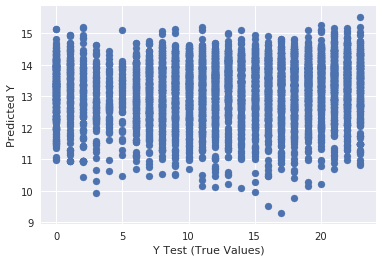

In [29]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Y')
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


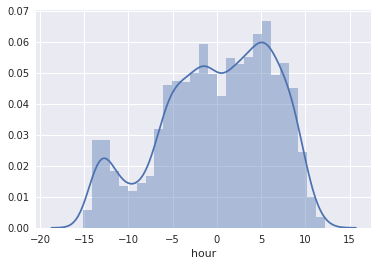

In [30]:
# histogram of the residuals
sns.distplot((y_test - predictions),bins='auto')

## Calculate metrics

In [31]:
from sklearn import metrics

## MAE
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
- mean of the absolute error
- take your error and take the absolute value of it and average it out.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 5.28073429085372


In [33]:
def L1(yHat, y):
    return np.sum(np.absolute(yHat - y))

L1(y_test,predictions)

32006.530536864397

# MSE

**Mean Squared Error** (MSE) is the mean of the squared errors:

- mean of the squared errors
- popular b/c it punish larger errors
- more usefull in the real world  because it takes into account larger b/c its square them.


$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [34]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 40.35864741208313


In [35]:
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size

MSE(y_test,predictions)

40.35864741208313

# RMSE
**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [36]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 6.352845615319416


## RSQ


In [37]:
print('RSQ:', metrics.explained_variance_score(y_test, predictions))

RSQ: 0.016862000389681886


In [38]:
params = pd.Series(model.coef_, index=X.columns)
params

dist_stadium             -1.493428
game_on                  -0.505040
OffenseType_Auto Theft    0.009694
OffenseType_Burglary     -1.291891
OffenseType_Murder        1.511587
OffenseType_Rape         -1.145252
OffenseType_Robbery       0.590628
OffenseType_Theft        -0.187002
weekday_Monday           -0.457892
weekday_Saturday         -0.536206
weekday_Sunday           -1.267866
weekday_Thursday         -0.060037
weekday_Tuesday           0.059772
weekday_Wednesday        -0.659376
dtype: float64

In [39]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [40]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                        effect  error
dist_stadium              -1.0    0.0
game_on                   -1.0    0.0
OffenseType_Auto Theft     0.0    0.0
OffenseType_Burglary      -1.0    0.0
OffenseType_Murder         2.0    2.0
OffenseType_Rape          -1.0    1.0
OffenseType_Robbery        1.0    0.0
OffenseType_Theft         -0.0    0.0
weekday_Monday            -0.0    0.0
weekday_Saturday          -1.0    0.0
weekday_Sunday            -1.0    0.0
weekday_Thursday          -0.0    0.0
weekday_Tuesday            0.0    0.0
weekday_Wednesday         -1.0    0.0
